In [4]:
import torch
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import easyocr
import cv2

In [3]:
# Load the YOLO model
yolo = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/b.pt', force_reload=True)



Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-12-6 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [14]:
img='/content/Cars0.png'

In [15]:
predict_image= yolo(img)

In [16]:
reader = easyocr.Reader(['en'])


In [17]:
def cordinates_detection(img,reader):
    predict_image=yolo(img)
    final_imgggg=[]
    text2=[]
    plate_img=[]
    current_coordinates = predict_image.xyxy[0][:, :-1]

    current_coordinates_cpu = current_coordinates.cpu().numpy()

    if current_coordinates_cpu.shape[1] == 5:
        current_coordinates_cpu = current_coordinates_cpu[:, :-1]  # Assuming the last column is not needed

    frame = cv2.imread(img)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    final_imgggg,predict_text=read_plate_number_image(current_coordinates_cpu, frame, reader)
    text2.append(predict_text)
    plate_img.append(final_imgggg)
    plt.imshow(plate_img[0])
    plt.axis('off')
    plt.title(text2[0])
    plt.show()

In [18]:
def read_plate_number_image(results, frame, reader):
    # Assuming results is a list of coordinates for one photo
    if len(results) > 0:  # Check if the list is not empty
        row = results[0]  # Take the first and only row
        confidence_index = -1  # Adjust this index based on your actual data structure

        if row[confidence_index] >= 0.5:  # Take img with 0.5 confidence
            xmin, ymin, xmax, ymax = row[:4]
            plate = frame[int(ymin):int(ymax), int(xmin):int(xmax)]

            gray = cv.cvtColor(plate, cv.COLOR_BGR2GRAY)
            blurred = cv.bilateralFilter(gray, 17, 15, 15)
            text = reader.readtext(blurred)
            text = ' '.join([t[1] for t in text])

            plot_img = frame.copy()

            cv.rectangle(plot_img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)  # BBox
            cv.rectangle(plot_img, (int(xmin), int(ymin - 20)), (int(xmax), int(ymin)), (0, 255, 0), -1)  # Text label background
            #final_img = cv.putText(plot_img, f"{text}", (int(xmin), int(ymin)), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            return plot_img ,text
    else:
        return None, None  # No plate detected


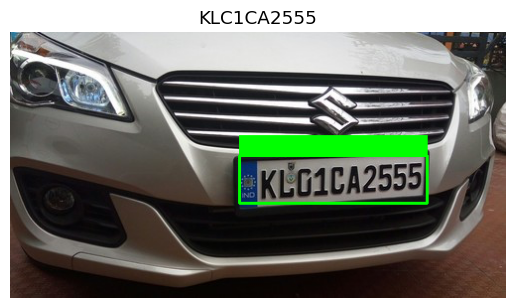

In [19]:
cordinates_detection(img,reader)